<a href="https://colab.research.google.com/github/harini1703/Diabetes-prediction-project/blob/main/Diabetes_Predication_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SUPPORT VECTOR MACHINE:**
Support vector machine solves both Classification and Regression problems.It s classified into Supervised learning.It contains a Hyperplane and a two parllel margins.The distance between the margins is said to be Marginal distance.The marginal distance line is created with respect to the nearest positive and negative point.Those positive and negative points are called as Support vectors.A support vector machine can have mutliple Hyperplane.When we higher the marginal distance,the more generalized model we get.There can Linear and Non lineae spearable.To solve Non Linear sperable we use SVM Kernals.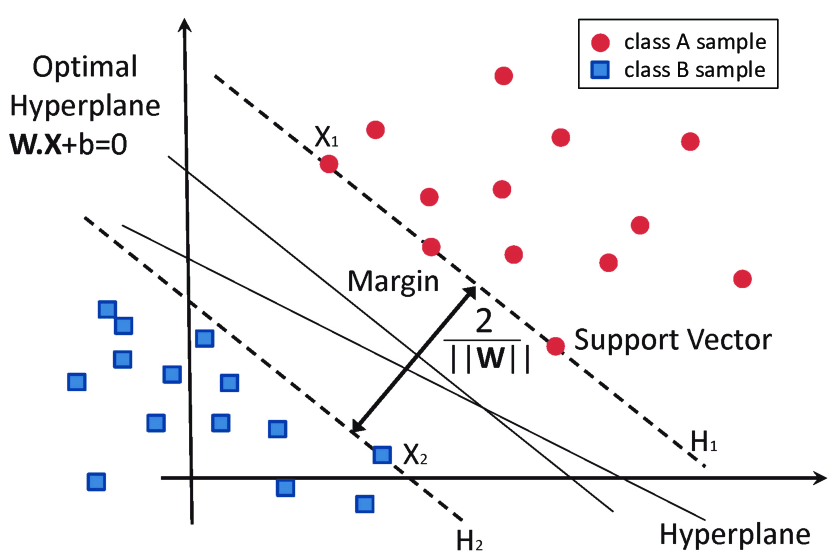
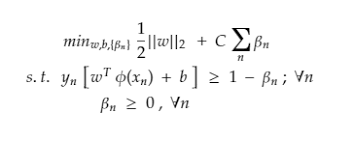

**PROJECT DESCRIPTION AND WORKFLOW:**
In this project we are going to train a model with various medical attributes like BMI,Blood glucose level.The Diabetes dataset is loaded to Support vector machine.It plots the data and finds the Hyperplane.After we split the data into a Training and test dataset.The training dataset will loaded to support vector machine classifier and it classifiy whether the patient has diabetes or not.After Training we get a Trained Support vector machine,when we give a new data it will predict and give result whether the person is diabetic or not.

Importing Libraries:


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #For standardising the data to common range
from sklearn.model_selection import train_test_split#For spliting the dataset into training and test data set
from sklearn import svm
from sklearn.metrics import accuracy_score




Data collection and analaysis:
Here we are using Diabetes.csv file extracted from UCI Machine Learning Repository.

In [ ]:
diabetes_dataset=pd.read_csv("/content/diabetes (1).csv") #Reading Diabetes csv file

In [ ]:
#Viewing the dataset using head() and tail() functions
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
diabetes_dataset.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

From the above data there labels like skin thickness,Insulin.In the outcome labels there are 0 and 1.When the outcome is 0,the patients are non-diabetic.
contrasting to it when its 1 the patients are diabetic.

In [ ]:
diabetes_dataset["BMI"]

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [ ]:
diabetes_dataset.shape

(768, 9)

In [ ]:
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
diabetes_dataset["Outcome"].value_counts()#To view the count of the outcome

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
diabetes_dataset.groupby('Outcome').mean()#Using groupby function to view that specific columns.

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [ ]:
#Separating the data and labels
X=diabetes_dataset.drop(columns="Outcome",axis=1)#For droping a columns mention axis=1,incase of a rom axis=0
Y=diabetes_dataset["Outcome"]

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data standarziation:

In [ ]:
scaler=StandardScaler()#Using the already imported standardscaler

In [ ]:
scaler.fit_transform(X)#Transforming data into standard way which helps the algorithm to predict efficiently

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
X=scaler.fit_transform(X)
Y=diabetes_dataset["Outcome"]

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split:

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
#Here text_size tells how the training set should be classified like 20% should assigned for test set and 80% for training set
#Here strtify splits so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter
#Here random_state tells when you run your program you will get different output because of splitting between train and test varies within,
#but when you set an integerto random_state you will get the same output everytime when you run the model 


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model:

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evalution:

Accuracy score:

In [ ]:
#accuracy score on training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print("Accuracy score of the training good:",training_data_accuracy)

Accuracy score of the training good: 0.7866449511400652


In [ ]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)#Accuracy score for test data 

In [ ]:
print("Accuracy score of the test good:",test_data_accuracy)

Accuracy score of the test good: 0.7727272727272727


Making a predictive system:

In [ ]:
input_data=(85,148	,72	,35	,0,	33.0,	0.627,	50)
#For testing non diabetic use this data (85,	66,	29,	0	,26.6,	0.351,	31)
input_data_as_numpy_array=np.asarray(input_data)#Changing into an array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)#reshaping because we are using only one instance
std_data=scaler.transform(input_data_reshaped)
print(std_data)
prediction=classifier.predict(std_data)
print(prediction)

if(prediction[0]==0):
     print("The person is  not diabetic")
else:
       print("The person is diabetic")


[[24.10029782  0.84832379  0.14964075  0.90726993 -0.69289057  0.12786122
   0.46849198  1.4259954 ]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
